In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('vif_data.csv')

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.columns

Index(['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors', 'No_of_Times_Visited', 'Condition_of_the_House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'no_of_years(house sold)',
       'house_is', 'Zipcode_table_Zipcode_2', 'Zipcode_table_Zipcode_3',
       'Zipcode_table_Zipcode_4', 'Zipcode_table_Zipcode_5',
       'Zipcode_table_Zipcode_6', 'Zipcode_table_Zipcode_7',
       'Zipcode_table_Zipcode_8', 'Zipcode_table_Zipcode_9',
       'Zipcode_table_Zipcode_10', 'sale_price'],
      dtype='object')

In [5]:
x = df.drop(['sale_price'],axis=1)
y = df['sale_price']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [8]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((17287, 25), (4322, 25), (17287,), (4322,))

# decision_tree_regressor


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [10]:
model = DecisionTreeRegressor()

In [11]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [12]:
prediction = model.predict(x_test)

In [13]:
model.score(x_test,y_test)

0.7333743234298054

## metrics

In [14]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [15]:
r2_score = r2_score(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = mse ** 0.5

In [16]:
print(f'r2_score : {r2_score}')
print(f'mae : {mae}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2_score : 0.7333743234298054
mae : 68869.46517815827
mse : 10528946287.544714
rmse : 102610.65386958956


In [17]:
table = pd.DataFrame({'y_test':y_test,'prediction':prediction})

<Figure size 2000x2500 with 0 Axes>

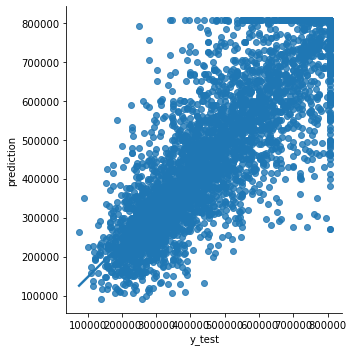

In [18]:
plt.figure(figsize=(20,25),dpi=100)
sns.lmplot('y_test','prediction',data=table)

## residuals

In [19]:
residual = prediction - y_test

residual_table = pd.DataFrame({'residuals' : residual,'predictions' : prediction})
residual_table = residual_table.sort_values(by='predictions')

In [20]:
residual_table.head()

,residuals,predictions
1064,-50000.0,90000.0
8034,-168305.0,90000.0
6348,-170000.0,100000.0
6731,-239500.0,105500.0
245,-74000.0,107000.0


In [21]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

(800000.0, -800000.0)

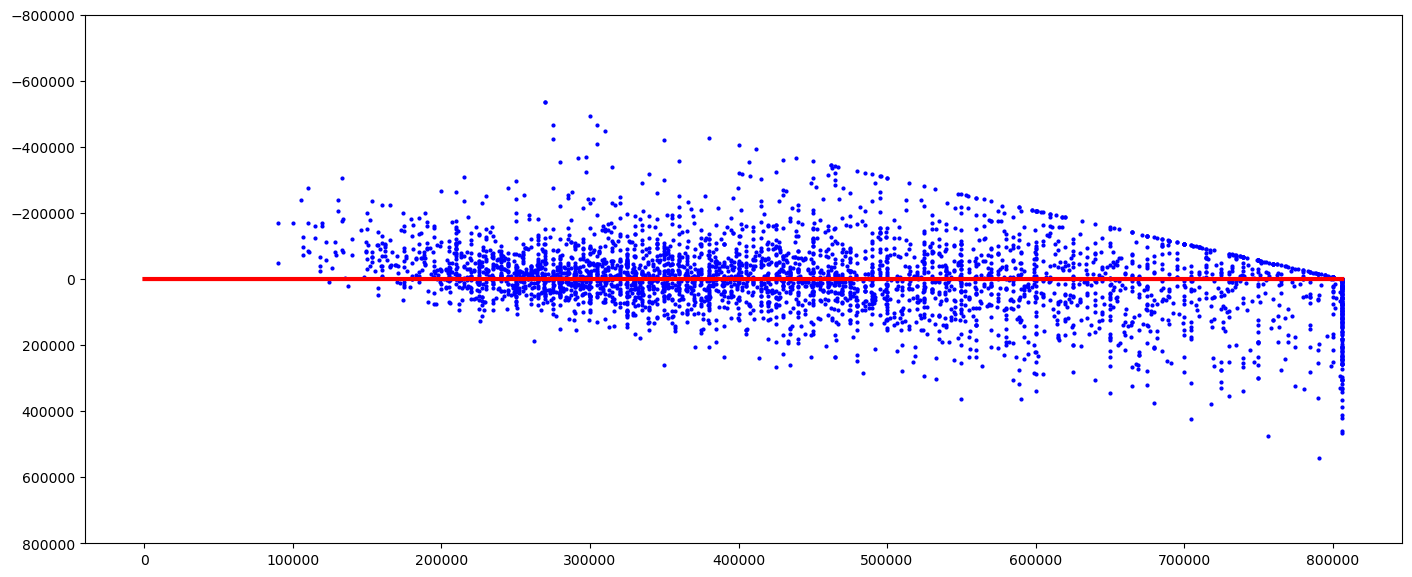

In [22]:
plt.figure(figsize=(17,7),dpi=100)
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='blue',s=4)
plt.plot(z,k,color='red',linewidth=3)
plt.ylim(800000,-800000)

## distribution of errors

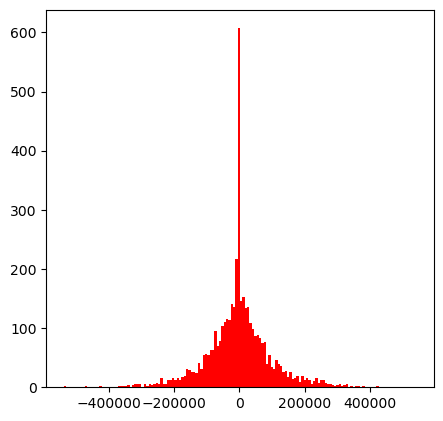

In [23]:
plt.figure(figsize=(5,5),dpi=100)
plt.hist(residual_table['residuals'],color='red',bins=150)
plt.show()

In [24]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, 
                   feature_names=['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors', 'No_of_Times_Visited', 'Condition_of_the_House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'no_of_years(house sold)',
       'house_is', 'Zipcode_table_Zipcode_2', 'Zipcode_table_Zipcode_3',
       'Zipcode_table_Zipcode_4', 'Zipcode_table_Zipcode_5',
       'Zipcode_table_Zipcode_6', 'Zipcode_table_Zipcode_7',
       'Zipcode_table_Zipcode_8', 'Zipcode_table_Zipcode_9',
       'Zipcode_table_Zipcode_10'],  
                   class_names='sale_price',
                   filled=True)


[Text(1106.0910343581338, 1073.9414634146342, 'Overall Grade <= 8.5\nmse = 38783608217.485\nsamples = 17287\nvalue = 484477.773'),
 Text(845.9842612952741, 1047.4243902439025, 'Overall Grade <= 7.5\nmse = 28480898933.62\nsamples = 13933\nvalue = 429917.263'),
 Text(549.4848918387227, 1020.9073170731708, 'Zipcode_table_Zipcode_2 <= 0.5\nmse = 22393811509.467\nsamples = 9064\nvalue = 379504.284'),
 Text(325.2001094017338, 994.3902439024391, 'Overall Grade <= 6.5\nmse = 22617029695.784\nsamples = 7274\nvalue = 406121.394'),
 Text(114.22077707836775, 967.8731707317073, 'Zipcode_table_Zipcode_8 <= 0.5\nmse = 17053772564.611\nsamples = 1430\nvalue = 316249.634'),
 Text(100.81396881129812, 941.3560975609756, 'Zipcode_table_Zipcode_6 <= 0.5\nmse = 14814791918.041\nsamples = 1363\nvalue = 306193.541'),
 Text(84.37775907359271, 914.8390243902439, 'Zipcode_table_Zipcode_10 <= 0.5\nmse = 13257121263.294\nsamples = 1144\nvalue = 287193.852'),
 Text(64.56869856591742, 888.3219512195122, 'Living Area

Error in callback <function flush_figures at 0x0000022BCD4BD790> (for post_execute):


KeyboardInterrupt: 